In [10]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import shap
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [11]:
glass_data = pd.read_csv('glass.csv')
breastw_data = pd.read_csv('breastw.csv')
mammography_data = pd.read_csv('mammography.csv')

glass_result = pd.read_csv('glass_result.csv') 
breastw_result = pd.read_csv('breastw_result.csv') 
mammography_result = pd.read_csv('mammography_result.csv') 

In [12]:
datasets = {
    "Glass Data": glass_data,
    "BreastW Data": breastw_data,
    "Mammography Data": mammography_data
}

Processing Glass Data...


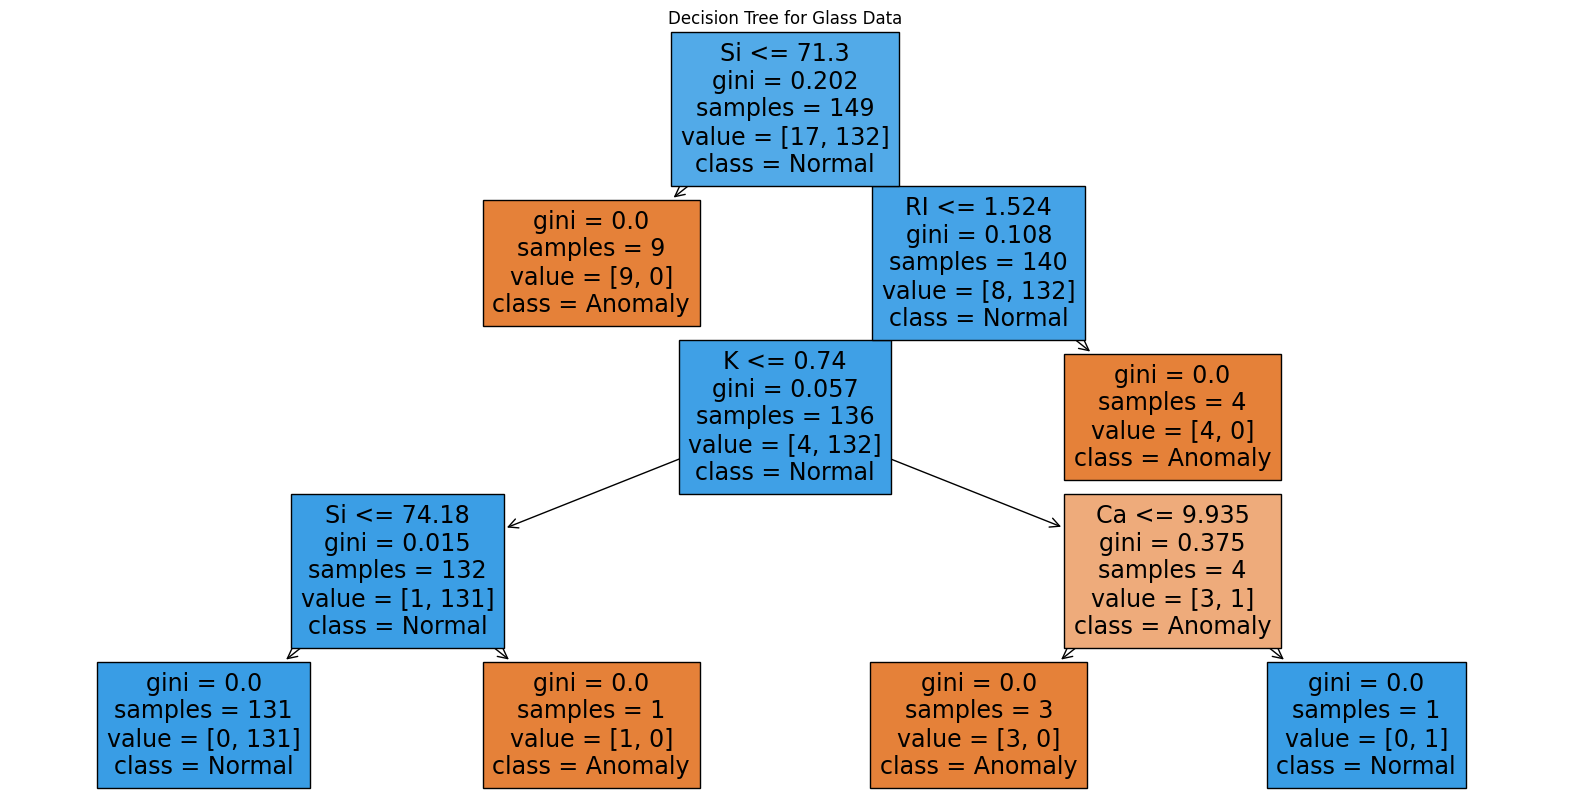

Processing BreastW Data...


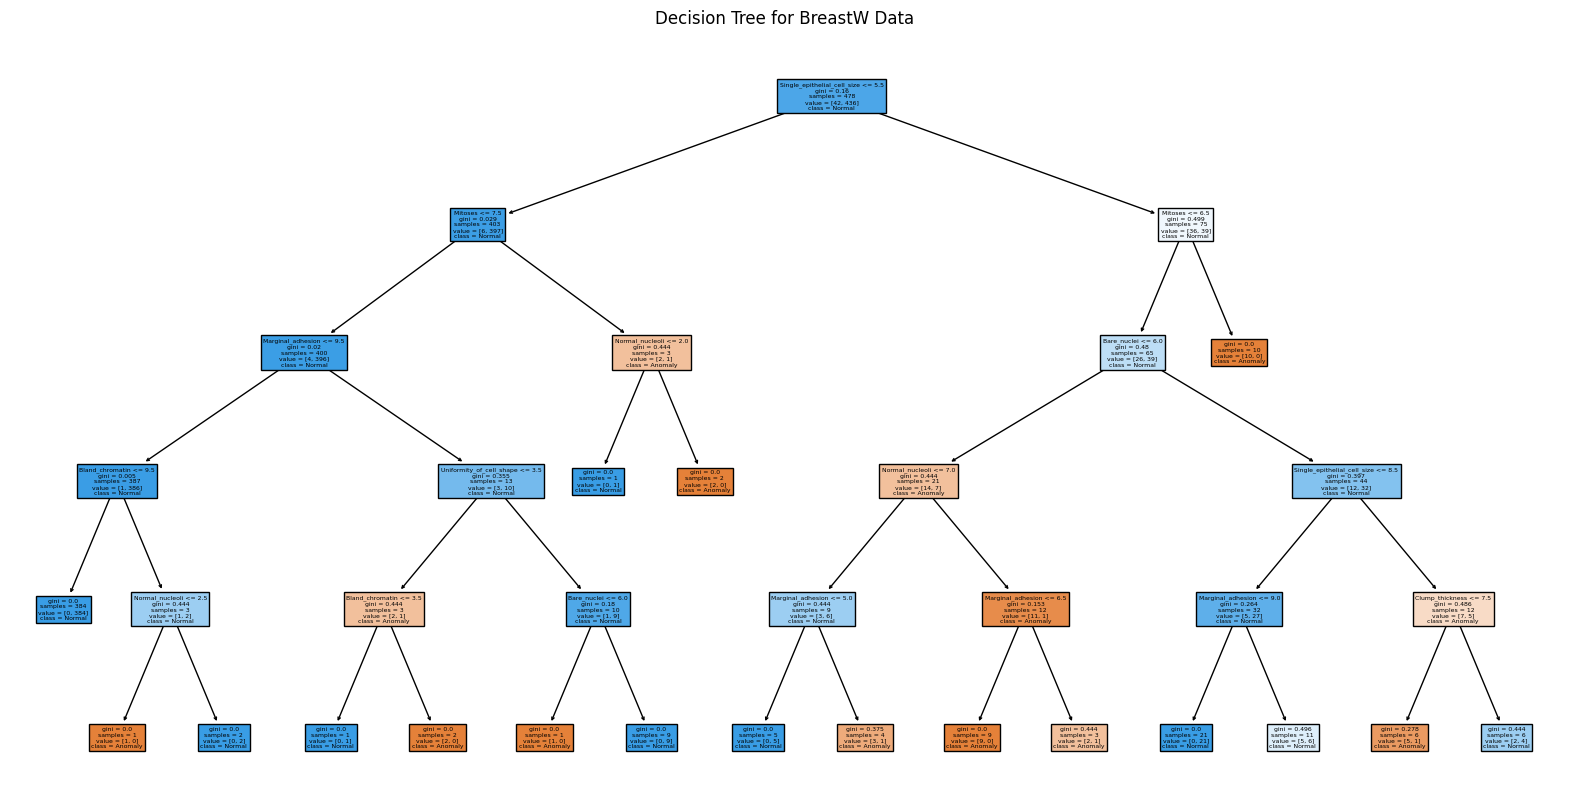

Processing Mammography Data...


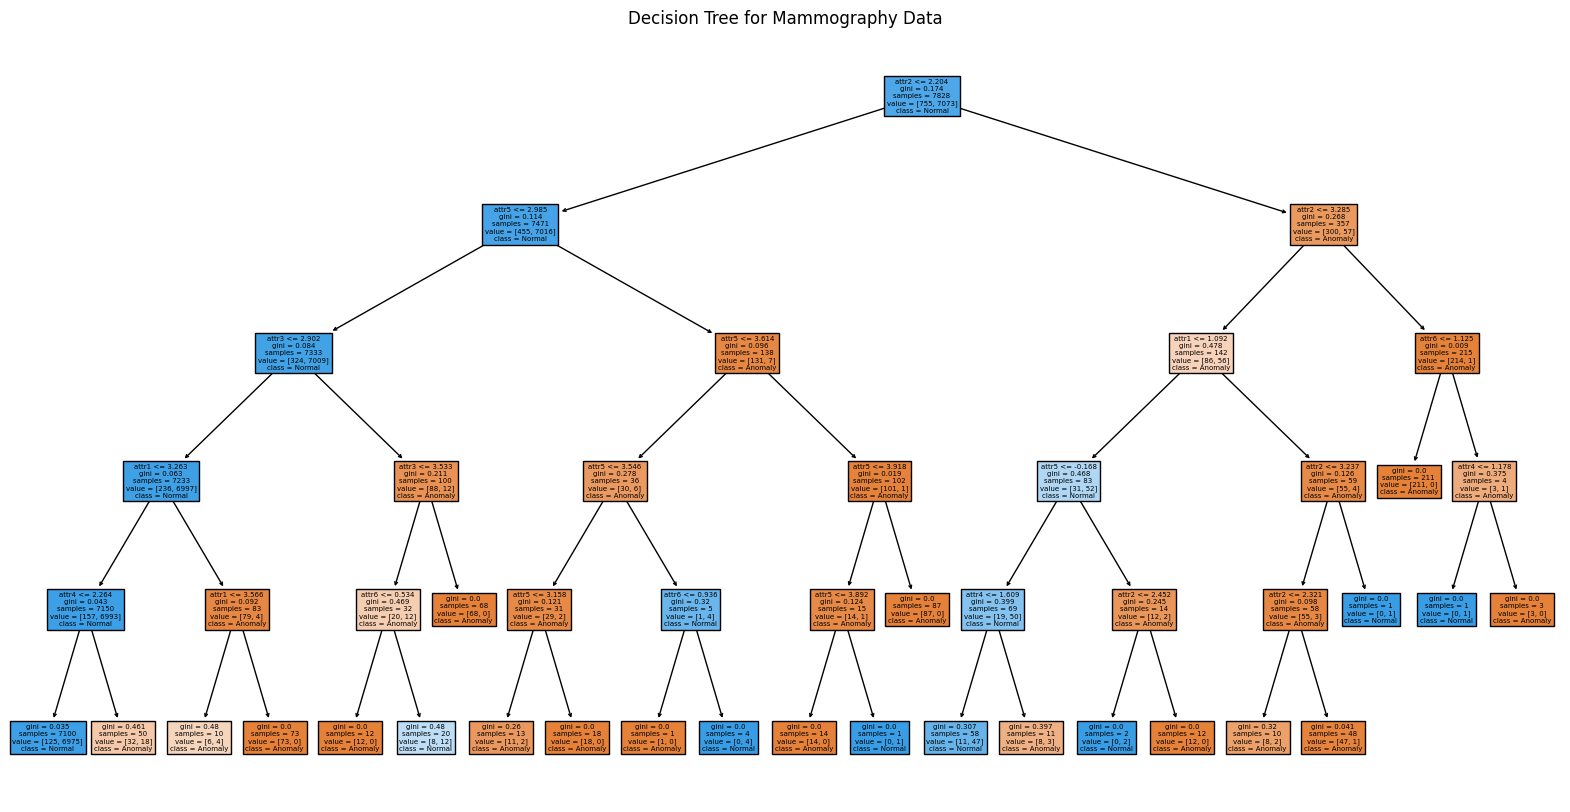

In [13]:
for name, data in datasets.items():
    print(f"Processing {name}...")
    
    # Anomaly detection using isolated forests
    iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
    labels = iso_forest.fit_predict(data)
    labels = (labels == 1).astype(int)  # 转换标签：1为正常，0为异常
    
    # Divide the dataset into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
    
    # Train the decision tree model

    tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
    tree_model.fit(X_train, y_train)
    
    # Visual decision tree
    feature_names = data.columns.tolist()  
    plt.figure(figsize=(20, 10))
    plot_tree(tree_model, filled=True, feature_names=feature_names, class_names=['Anomaly', 'Normal'])
    plt.title(f"Decision Tree for {name}")
    plt.show()

    #adjusted_labels = np.where(predictions == -1, 1, 0)

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report


glass_data = pd.read_csv('glass.csv') 
breastw_data = pd.read_csv('breastw.csv') 
mammography_data = pd.read_csv('mammography.csv')  
glass_result = pd.read_csv('glass_result.csv') 
breastw_result = pd.read_csv('breastw_result.csv') 
mammography_result = pd.read_csv('mammography_result.csv') 

datasets = {
    "Glass": (glass_data, glass_result),
    "BreastW": (breastw_data, breastw_result),
    "Mammo": (mammography_data,mammography_result)
}

# Traverse the data set for anomaly detection and accuracy assessment
for name, (data, true_results) in datasets.items():
    # 准备数据
    X = data  

    iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
    iso_forest.fit(X)
    predictions = iso_forest.predict(X)

    # Convert -1 to 1 (abnormal) and 1 to 0 (normal)
    predicted_labels = np.where(predictions == -1, 1, 0)

    # Calculation accuracy and other performance indicators
    accuracy = accuracy_score(true_results, predicted_labels)
    print(f"{name} Dataset:")
    print(f"Accuracy: {accuracy}")
    print(classification_report(true_results, predicted_labels))
    print("\n")


Glass Dataset:
Accuracy: 0.8785046728971962
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       205
           1       0.10      0.22      0.13         9

    accuracy                           0.88       214
   macro avg       0.53      0.56      0.53       214
weighted avg       0.93      0.88      0.90       214



BreastW Dataset:
Accuracy: 0.9546120058565154
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       444
           1       0.91      0.97      0.94       239

    accuracy                           0.95       683
   macro avg       0.94      0.96      0.95       683
weighted avg       0.96      0.95      0.95       683



Mammo Dataset:
Accuracy: 0.8630063489224716
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     10923
           1       0.11      0.68      0.19       260

    accuracy                           0.86 

In [15]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split


X = breastw_data
y =breastw_result


iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(X)
iso_labels = iso_forest.predict(X)
iso_labels = (iso_labels == 1).astype(int)  # 转换标签：1为正常，0为异常

# Use random forests to assess the importance of features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, iso_labels)

# Gets and displays feature importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_df)



                       Feature  Importance
1      Uniformity_of_cell_size    0.360503
2     Uniformity_of_cell_shape    0.181920
4  Single_epithelial_cell_size    0.133770
6              Bland_chromatin    0.116052
5                  Bare_nuclei    0.078157
7              Normal_nucleoli    0.063299
0              Clump_thickness    0.029128
8                      Mitoses    0.020919
3            Marginal_adhesion    0.016251


Combine shap (in shap file)

Combine two importance and delete several attributes

In [16]:
# X is  feature data DataFrame and the model is a trained model
explainer = shap.TreeExplainer(rf)
shap_interaction_values = explainer.shap_interaction_values(X)

#shap_interaction_values is a matrix where each element i and j represents the interaction of feature i and feature j


In [17]:
shap_interaction_values

array([[[[-1.03671427e-02,  1.03671427e-02],
         [ 1.73606965e-03, -1.73606965e-03],
         [ 1.61935520e-03, -1.61935520e-03],
         ...,
         [-6.95686727e-04,  6.95686727e-04],
         [ 2.50047931e-05, -2.50047931e-05],
         [ 3.84964259e-04, -3.84964259e-04]],

        [[ 1.73606965e-03, -1.73606965e-03],
         [-2.11540040e-01,  2.11540040e-01],
         [ 3.56704636e-02, -3.56704636e-02],
         ...,
         [ 5.08934618e-03, -5.08934618e-03],
         [ 5.98344406e-03, -5.98344406e-03],
         [ 1.41588960e-03, -1.41588960e-03]],

        [[ 1.61935520e-03, -1.61935520e-03],
         [ 3.56704636e-02, -3.56704636e-02],
         [-1.41198905e-01,  1.41198905e-01],
         ...,
         [-6.28817770e-04,  6.28817770e-04],
         [ 3.76472758e-03, -3.76472758e-03],
         [-1.72267699e-03,  1.72267699e-03]],

        ...,

        [[-6.95686727e-04,  6.95686727e-04],
         [ 5.08934618e-03, -5.08934618e-03],
         [-6.28817770e-04,  6.28817770

# Delete three unimportant attributes, recalculate exception detection accuracy and feature importance 

In [18]:
breastw_data

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [19]:
import pandas as pd
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


breastw_data = pd.read_csv('breastw.csv')
data =breastw_data

# drop
data.drop([ 'Mitoses', 'Marginal_adhesion','Clump_thickness'], axis=1,inplace=True)


X = data
y = breastw_result


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(X_train)
predictions = iso_forest.predict(X_test)
predictions = (predictions == -1).astype(int)  # 转换标签：1为正常，0为异常


print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Accuracy: 0.9365853658536586
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       127
           1       0.86      1.00      0.92        78

    accuracy                           0.94       205
   macro avg       0.93      0.95      0.93       205
weighted avg       0.95      0.94      0.94       205

Feature Importances:
                       Feature  Importance
0      Uniformity_of_cell_size    0.281937
3                  Bare_nuclei    0.224319
1     Uniformity_of_cell_shape    0.223530
4              Bland_chromatin    0.138443
2  Single_epithelial_cell_size    0.078231
5              Normal_nucleoli    0.053539


D:\anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# The importance test was carried out by using shap values

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt


data = breastw_data   
X = data  
y = breastw_result  


iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X)
predictions = iso_forest.predict(X)

# Transform the output labels of isolated forests to fit the supervised learning model

labels = np.where(predictions == -1, 1, 0)


In [21]:

print(X_train.shape)
print(X_test.shape)


(478, 6)
(205, 6)


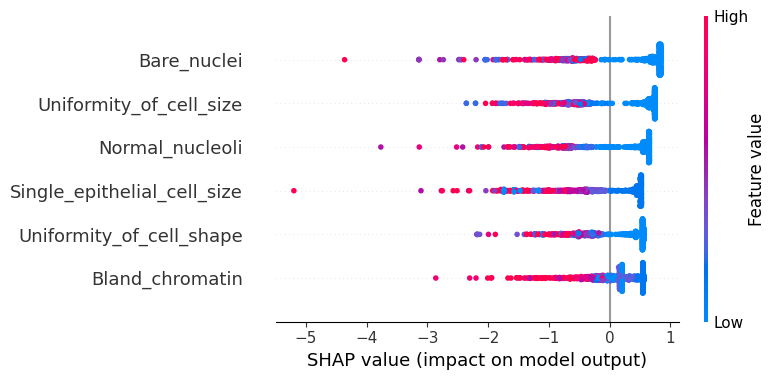

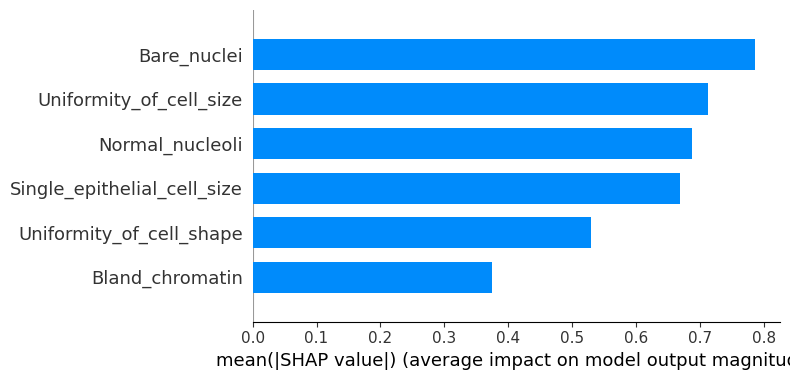

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


#explainer = shap.TreeExplainer(rf)

#shap_values = explainer(X_test)

#shap.summary_plot(shap_values[1], X_test, plot_type="bar")  

isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
isolation_forest.fit(breastw_data)

explainer = shap.TreeExplainer(isolation_forest)


shap_values = explainer(breastw_data)

shap.summary_plot(shap_values.values, breastw_data, feature_names=breastw_data.columns)
shap.summary_plot(shap_values,breastw_data,plot_type="bar")

In [23]:

shap_values_full = explainer.shap_values(X_test)

# Use force_plot to display the entire test set
force_plot_full = shap.force_plot(explainer.expected_value[0], shap_values_full[1], X_test)
shap.save_html("full_force_plot.html", force_plot_full)  # 保存为 HTML 文件


DimensionError: Length of features is not equal to the length of shap_values!

The following part is to combine shap and random forset to figure out the importance of features, and then draw the decision tree

In [25]:
datasets = {
    "Glass Data": glass_data,
    "BreastW Data": breastw_data,
    "Mammography Data": mammography_data
}

Processing Glass Data...


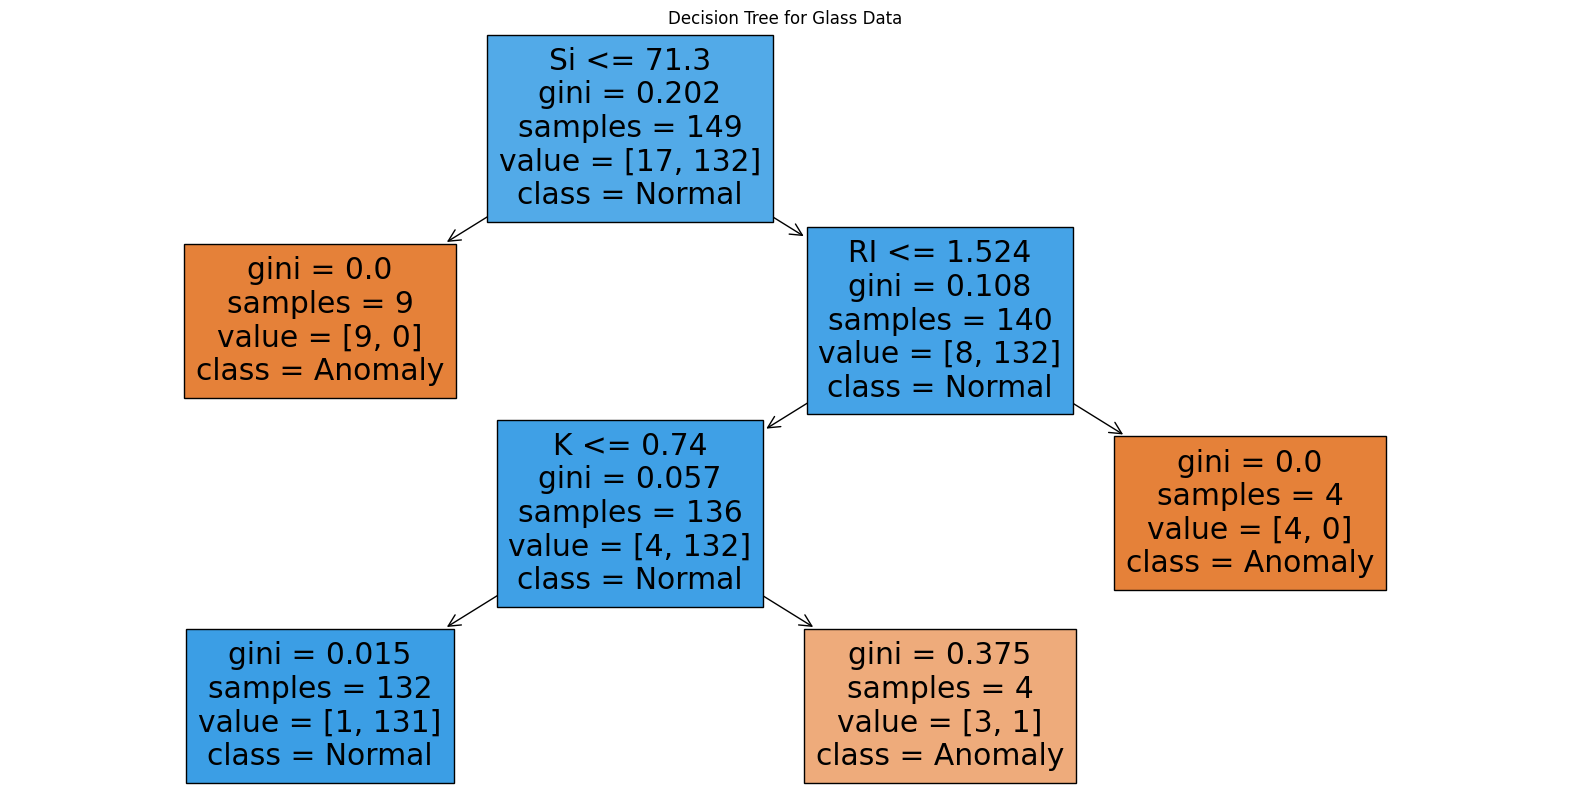

Processing BreastW Data...


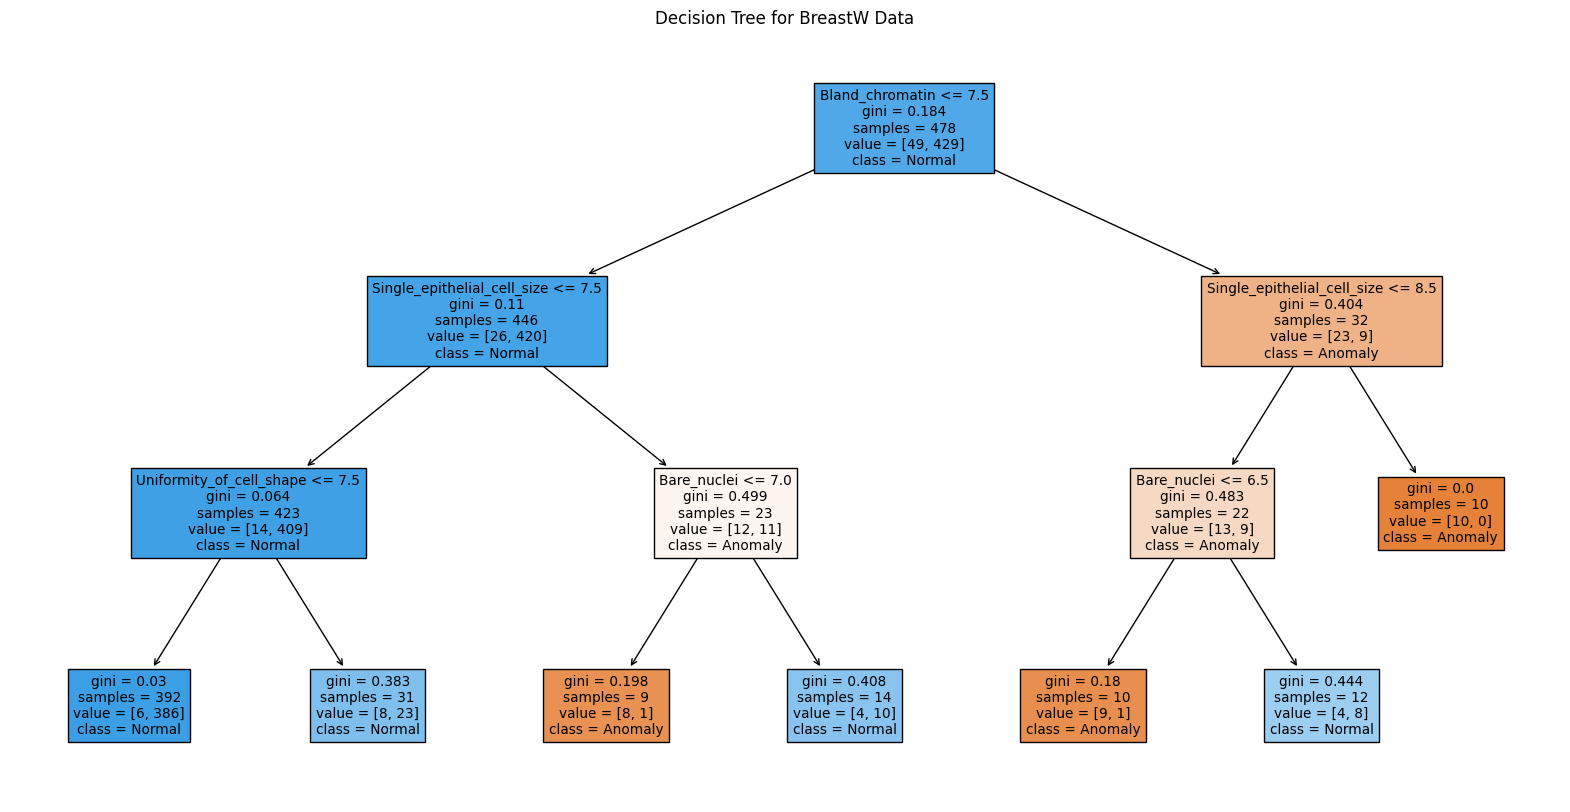

Processing Mammography Data...


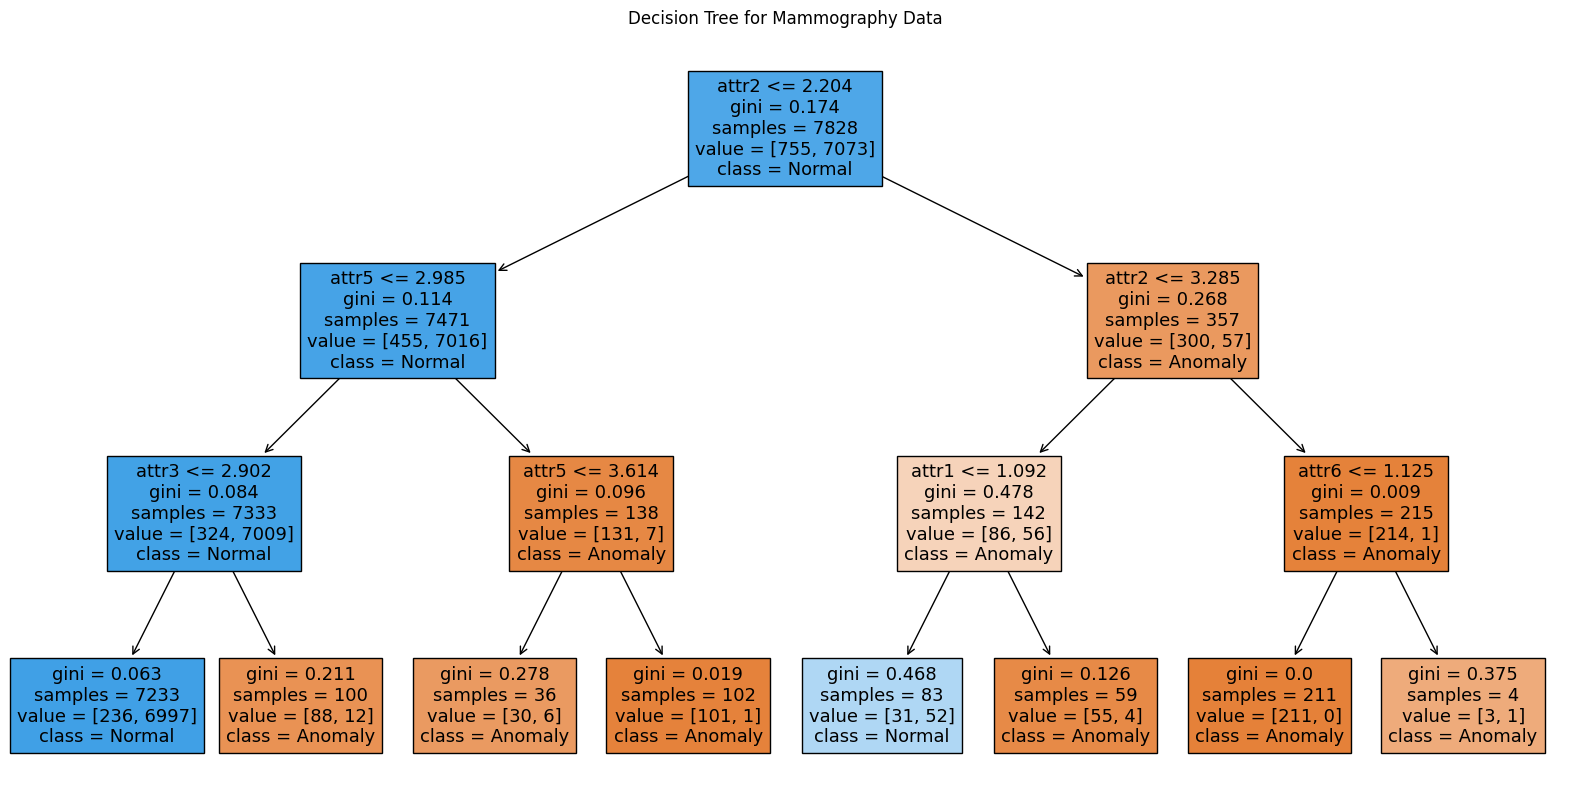

In [26]:
for name, data in datasets.items():
    print(f"Processing {name}...")
    
    
    iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
    labels = iso_forest.fit_predict(data)
    labels = (labels == 1).astype(int)  
    
    
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
    
    # Train the decision tree model
    tree_model = DecisionTreeClassifier(max_depth=3, random_state=45)
    tree_model.fit(X_train, y_train)
    
    # Visual decision tree
    feature_names = data.columns.tolist()  
    plt.figure(figsize=(20, 10))
    plot_tree(tree_model, filled=True, feature_names=feature_names, class_names=['Anomaly', 'Normal'])
    plt.title(f"Decision Tree for {name}")
    plt.show()

    adjusted_labels = np.where(predictions == -1, 1, 0)

In [27]:
interactions=True

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


#explainer = shap.TreeExplainer(rf)

#shap_values = explainer(X_test)

#shap.summary_plot(shap_values[1], X_test, plot_type="bar") 

isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
isolation_forest.fit(breastw_data)

explainer = shap.TreeExplainer(isolation_forest)


shap_values = explainer(breastw_data)

shap.summary_plot(shap_values.values, breastw_data, feature_names=breastw_data.columns)
shap.summary_plot(shap_values,breastw_data,plot_type="bar")

ValueError: Found input variables with inconsistent numbers of samples: [683, 11183]